Group Members: Asha Karmakar, Akhil Iyer, Megan Sundheim, Grace Kim
Asha -
Grace -
Akhil - 
Megan - 

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

<p> https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features </p>

<h1> Data Preprocessing & Exploration </h1>

In [2]:
# Read in csv file
df = pd.read_csv("./data/genres.csv")

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Clean data
# Remove the following columns: type, id, uri, track_href, analysis_url, unnamed, title, song_name
df = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'genre']]

In [4]:
# one hot encode time signature
df = pd.get_dummies(df, columns=['time_signature'], drop_first=False)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,genre,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,124539,Dark Trap,0,0,1,0
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,224427,Dark Trap,0,0,1,0
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,98821,Dark Trap,0,0,1,0
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,123661,Dark Trap,0,1,0,0
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,123298,Dark Trap,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,269208,hardstyle,0,0,1,0
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,210112,hardstyle,0,0,1,0
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,234823,hardstyle,0,0,1,0
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,323200,hardstyle,0,0,1,0


In [5]:
# Separate data into features and class labels
features = df.drop('genre', axis=1)
labels = df['genre']

In [6]:
print(features.head())
label_groups = df.groupby('genre')
print(label_groups.size())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  \
0          0.013400    0.0556   0.3890  156.985       124539   
1          0.000000    0.1180   0.1240  115.080       224427   
2          0.000004    0.3720   0.0391  218.050        98821   
3          0.000000    0.1140   0.1750  186.948       123661   
4          0.000000    0.1660   0.5910  147.988       123298   

   time_signature_1  time_signature_3  time_signature_4  time_signature_5  
0                 0                 0                 1                 0  
1           

In [7]:
# There are no missing values:
null_data = df[df.isnull().any(axis=1)]
len(null_data)

0

In [8]:
len(features)

42305

[Text(0.5, 0, 'danceability'),
 Text(1.5, 0, 'energy'),
 Text(2.5, 0, 'key'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'mode'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'duration_ms'),
 Text(12.5, 0, 'time_signature_1'),
 Text(13.5, 0, 'time_signature_3'),
 Text(14.5, 0, 'time_signature_4'),
 Text(15.5, 0, 'time_signature_5')]

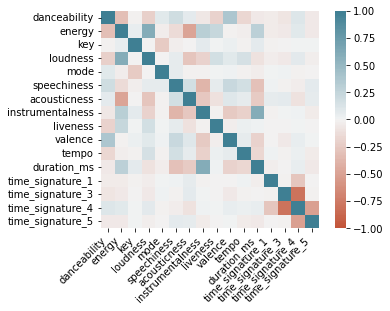

In [9]:
import seaborn as sns

# correlation between features

ax = sns.heatmap(
    features.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [10]:
# Perform Anomaly Detection.
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

y_pred_list = []

envelope_pred = EllipticEnvelope().fit_predict(features)
y_pred_list.append(envelope_pred)

# apply IsolationForest AD
forest_pred = IsolationForest().fit_predict(features)
y_pred_list.append(forest_pred)

# apply LocalOutlierFactor AD
lof_pred = LocalOutlierFactor().fit_predict(features)
y_pred_list.append(lof_pred)

y_pred_list

[array([ 1, -1, -1, ...,  1,  1,  1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1])]

In [11]:
# Drop anomalous points.
from collections import Counter

features_no_anomalies = features.copy()
labels_no_anomalies = labels.copy()
anomaly_indices = set()
for arr in y_pred_list:
    c = Counter(arr)
    print(c)
    i = len(arr) - 1
    while i >= 0:
        if arr[i] == -1:
            anomaly_indices.add(i)
        i -= 1
        
# Drop anomalies indicated by any of the 3 anomaly detection algorithms.
anomaly_indices = list(anomaly_indices)
anomaly_indices.sort()
features_no_anomalies = features_no_anomalies.drop(anomaly_indices, axis=0)
labels_no_anomalies = labels_no_anomalies.drop(anomaly_indices, axis=0)

features_no_anomalies = features_no_anomalies.reset_index().drop('index', axis=1)
labels_no_anomalies = labels_no_anomalies.reset_index().drop('index', axis=1)
label_groups = labels_no_anomalies.groupby('genre')
print(label_groups.size())
print("\nSize of new dataset: %i" % len(features_no_anomalies))
#TODO bar graph

Counter({1: 38074, -1: 4231})
Counter({1: 37886, -1: 4419})
Counter({1: 40473, -1: 1832})
genre
Dark Trap          3183
Emo                1255
Hiphop             2098
Pop                 366
Rap                1349
RnB                1434
Trap Metal         1422
Underground Rap    4381
dnb                2784
hardstyle          2670
psytrance          2689
techhouse          2782
techno             2483
trance             2772
trap               2739
dtype: int64

Size of new dataset: 34407


In [12]:
# Downsample data to mitigate for class imbalance.
import math
import random

min_size = math.inf
for genre in label_groups.groups.keys():
    genre_group = label_groups.get_group(genre)
    if len(genre_group) < min_size:
        min_size = len(genre_group)
num_samples = min_size

# Sample same number of points from each genre to balance classes.
samp_features = []
samp_genres = []
samp_records = []
df_no_anomalies = pd.DataFrame(features_no_anomalies.copy())
df_no_anomalies['genre'] = labels_no_anomalies
genres = df_no_anomalies.groupby('genre')
for genre in genres.groups.keys():
    genre_group = genres.get_group(genre)
    genre_group_copy = genre_group.copy()
    genre_group_copy = genre_group_copy.reset_index()
    for i in range(num_samples):
        index = random.randint(0, len(genre_group_copy) - 1)
        samp_records.append(genre_group_copy.iloc[index, :])

samp_features = pd.DataFrame(samp_records).set_index('index')
samp_genres = samp_features['genre']
samp_features = samp_features.drop('genre', axis=1)
print(samp_features)
print(samp_genres)

       danceability  energy  key  loudness  mode  speechiness  acousticness  \
index                                                                         
474           0.592   0.654    5   -11.155     0       0.0525      0.137000   
429           0.497   0.570    2   -10.119     1       0.2690      0.154000   
174           0.674   0.862    7    -3.400     1       0.2310      0.018900   
3102          0.586   0.459    1   -10.204     1       0.0318      0.085900   
1885          0.481   0.903    8    -5.754     1       0.0372      0.031800   
...             ...     ...  ...       ...   ...          ...           ...   
28168         0.412   0.731   11    -3.761     1       0.0674      0.000088   
28176         0.716   0.980    1    -1.507     1       0.3430      0.002520   
27156         0.573   0.974    1     0.387     0       0.0648      0.000253   
26810         0.599   0.830    1    -1.814     1       0.2140      0.002010   
28325         0.400   0.883    8    -1.098     1    

<h1> Model Building </h1>

### Neural Networks

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [14]:
# try with anomalies - 66%
# try without anomalies - 68%
# try with downsampled - 59%

### With Anomalies

<p>Using the entire dataset with 42305 records, the MLPClassifier predicted the correct genre with 66% accuracy.</p> 

In [15]:
scaler = StandardScaler()
mlp_orig = MLPClassifier(random_state=1, early_stopping=True, max_iter=50, verbose=True)

mlp_param = {
    'mlp__hidden_layer_sizes': list(range(90, 110, 10)),
    'mlp__activation': ('logistic', 'tanh', 'relu'),
    'mlp__solver': ('sgd','adam'),
    'mlp__alpha': (0.0001, 0.05),
    'mlp__learning_rate': ('constant','adaptive') 
}

mlp_orig_pipe = Pipeline([('scaler', scaler), ('mlp', mlp_orig)])
mlp_orig_grid = GridSearchCV(mlp_orig_pipe, mlp_param, n_jobs=-1, cv=5)
y_orig_pred = cross_val_predict(mlp_orig_grid, features, labels, cv=5)

Iteration 1, loss = 2.02550755
Validation score: 0.493648
Iteration 2, loss = 1.40760089
Validation score: 0.540030
Iteration 3, loss = 1.27167554
Validation score: 0.557164
Iteration 4, loss = 1.21273231
Validation score: 0.574889
Iteration 5, loss = 1.17271571
Validation score: 0.579321
Iteration 6, loss = 1.13845574
Validation score: 0.589956
Iteration 7, loss = 1.10779249
Validation score: 0.604431
Iteration 8, loss = 1.08256297
Validation score: 0.609453
Iteration 9, loss = 1.06091463
Validation score: 0.615362
Iteration 10, loss = 1.04367280
Validation score: 0.618021
Iteration 11, loss = 1.02917199
Validation score: 0.620089
Iteration 12, loss = 1.01722912
Validation score: 0.624225
Iteration 13, loss = 1.00698810
Validation score: 0.622452
Iteration 14, loss = 0.99818102
Validation score: 0.624815
Iteration 15, loss = 0.99040441
Validation score: 0.628360
Iteration 16, loss = 0.98315377
Validation score: 0.632496
Iteration 17, loss = 0.97675020
Validation score: 0.627179
Iterat

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.02990545
Validation score: 0.501329
Iteration 2, loss = 1.41161362
Validation score: 0.554210
Iteration 3, loss = 1.27751038
Validation score: 0.570162
Iteration 4, loss = 1.21977021
Validation score: 0.583752
Iteration 5, loss = 1.18023227
Validation score: 0.599114
Iteration 6, loss = 1.14675694
Validation score: 0.605318
Iteration 7, loss = 1.11746186
Validation score: 0.616248
Iteration 8, loss = 1.09316367
Validation score: 0.623634
Iteration 9, loss = 1.07318774
Validation score: 0.624815
Iteration 10, loss = 1.05674257
Validation score: 0.625406
Iteration 11, loss = 1.04375505
Validation score: 0.637518
Iteration 12, loss = 1.03298344
Validation score: 0.636928
Iteration 13, loss = 1.02336030
Validation score: 0.636337
Iteration 14, loss = 1.01562603
Validation score: 0.633383
Iteration 15, loss = 1.00844243
Validation score: 0.638700
Iteration 16, loss = 1.00220112
Validation score: 0.638996
Iteration 17, loss = 0.99678781
Validation score: 0.637518
Iterat

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 2.02048476
Validation score: 0.507829
Iteration 2, loss = 1.39137655
Validation score: 0.560414
Iteration 3, loss = 1.25097884
Validation score: 0.573117
Iteration 4, loss = 1.19181398
Validation score: 0.596750
Iteration 5, loss = 1.15230809
Validation score: 0.606795
Iteration 6, loss = 1.11793077
Validation score: 0.614476
Iteration 7, loss = 1.08693733
Validation score: 0.623338
Iteration 8, loss = 1.06081103
Validation score: 0.628656
Iteration 9, loss = 1.03862679
Validation score: 0.635746
Iteration 10, loss = 1.02021317
Validation score: 0.636337
Iteration 11, loss = 1.00557735
Validation score: 0.643131
Iteration 12, loss = 0.99281365
Validation score: 0.640768
Iteration 13, loss = 0.98267504
Validation score: 0.645199
Iteration 14, loss = 0.97334274
Validation score: 0.643427
Iteration 15, loss = 0.96469195
Validation score: 0.646677
Iteration 16, loss = 0.95724087
Validation score: 0.649040
Iteration 17, loss = 0.95110220
Validation score: 0.649040
Iterat

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93327824
Validation score: 0.528508
Iteration 2, loss = 1.35002005
Validation score: 0.560709
Iteration 3, loss = 1.23571667
Validation score: 0.574889
Iteration 4, loss = 1.18232348
Validation score: 0.587592
Iteration 5, loss = 1.14320178
Validation score: 0.599409
Iteration 6, loss = 1.10923266
Validation score: 0.608567
Iteration 7, loss = 1.08146568
Validation score: 0.623338
Iteration 8, loss = 1.05849694
Validation score: 0.624520
Iteration 9, loss = 1.04020961
Validation score: 0.632201
Iteration 10, loss = 1.02482135
Validation score: 0.634860
Iteration 11, loss = 1.01215377
Validation score: 0.634860
Iteration 12, loss = 1.00099248
Validation score: 0.639882
Iteration 13, loss = 0.99121182
Validation score: 0.633973
Iteration 14, loss = 0.98385916
Validation score: 0.637814
Iteration 15, loss = 0.97585070
Validation score: 0.643722
Iteration 16, loss = 0.96972450
Validation score: 0.636337
Iteration 17, loss = 0.96417089
Validation score: 0.644904
Iterat

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.93268461
Validation score: 0.521123
Iteration 2, loss = 1.34753172
Validation score: 0.561004
Iteration 3, loss = 1.23327787
Validation score: 0.575480
Iteration 4, loss = 1.17967570
Validation score: 0.594092
Iteration 5, loss = 1.13992388
Validation score: 0.607681
Iteration 6, loss = 1.10548259
Validation score: 0.614771
Iteration 7, loss = 1.07695659
Validation score: 0.621270
Iteration 8, loss = 1.05341299
Validation score: 0.629838
Iteration 9, loss = 1.03500621
Validation score: 0.630724
Iteration 10, loss = 1.01899635
Validation score: 0.633678
Iteration 11, loss = 1.00606711
Validation score: 0.636928
Iteration 12, loss = 0.99530906
Validation score: 0.643131
Iteration 13, loss = 0.98534318
Validation score: 0.639291
Iteration 14, loss = 0.97820588
Validation score: 0.642245
Iteration 15, loss = 0.96996138
Validation score: 0.647267
Iteration 16, loss = 0.96453978
Validation score: 0.646677
Iteration 17, loss = 0.95824231
Validation score: 0.646677
Iterat

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
print('Results on the entire dataset:')
print(classification_report(labels, y_orig_pred))

Results on the entire dataset:
                 precision    recall  f1-score   support

      Dark Trap       0.54      0.40      0.46      4578
            Emo       0.62      0.62      0.62      1680
         Hiphop       0.43      0.39      0.41      3028
            Pop       0.23      0.05      0.08       461
            Rap       0.56      0.31      0.40      1848
            RnB       0.36      0.35      0.35      2099
     Trap Metal       0.48      0.27      0.35      1956
Underground Rap       0.44      0.65      0.52      5875
            dnb       0.92      0.96      0.94      2966
      hardstyle       0.80      0.90      0.84      2936
      psytrance       0.90      0.90      0.90      2961
      techhouse       0.84      0.87      0.85      2975
         techno       0.84      0.85      0.85      2956
         trance       0.77      0.82      0.79      2999
           trap       0.80      0.78      0.79      2987

       accuracy                           0.66     4230

Confusion matrix for the original dataset:


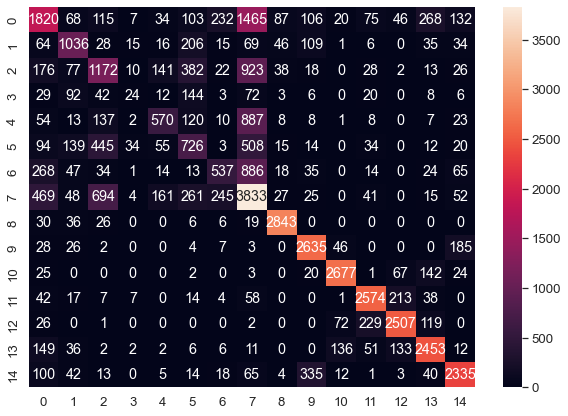

In [17]:
print('Confusion matrix for the original dataset:')
cm_orig = metrics.confusion_matrix(labels,y_orig_pred)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
sn.heatmap(cm_orig, annot=True, fmt='g')
plt.show()

### Without Anomalies
<p> Using the dataset with anomalies removed (according to the anomaly detection process from earlier), the model's accuracy increased slightly to 68%. This could be because the records that were considered edge cases (most unlike the other records in that class) have been removed so there are fewer records that are more likely to be misclassified by the model.</p>

In [24]:
mlp_noanom = MLPClassifier(random_state=1, early_stopping=True, max_iter=100)

mlp_param = {
    'mlp__hidden_layer_sizes': list(range(90, 110, 10)),
    'mlp__activation': ('logistic', 'tanh', 'relu'),
    'mlp__solver': ('sgd','adam'),
    'mlp__alpha': (0.0001, 0.05),
    'mlp__learning_rate': ('constant','adaptive') 
}

mlp_noanom_pipe = Pipeline([('scaler', scaler), ('mlp', mlp_noanom)])
mlp_noanom_grid = GridSearchCV(mlp_noanom_pipe, mlp_param, n_jobs=-1, cv=5)
y_noanom_pred = cross_val_predict(mlp_noanom_grid, features_no_anomalies, labels_no_anomalies, cv=5)

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was p

In [25]:
print('Results on the dataset without anomalies:')
print(classification_report(labels_no_anomalies, y_noanom_pred))

Results on the dataset without anomalies:
                 precision    recall  f1-score   support

      Dark Trap       0.49      0.32      0.39      3183
            Emo       0.64      0.66      0.65      1255
         Hiphop       0.46      0.41      0.43      2098
            Pop       0.34      0.09      0.14       366
            Rap       0.52      0.26      0.34      1349
            RnB       0.36      0.32      0.34      1434
     Trap Metal       0.47      0.27      0.35      1422
Underground Rap       0.44      0.66      0.53      4381
            dnb       0.93      0.96      0.94      2784
      hardstyle       0.81      0.89      0.85      2670
      psytrance       0.90      0.90      0.90      2689
      techhouse       0.83      0.88      0.85      2782
         techno       0.84      0.84      0.84      2483
         trance       0.76      0.82      0.79      2772
           trap       0.80      0.80      0.80      2739

       accuracy                           0.

<AxesSubplot:>

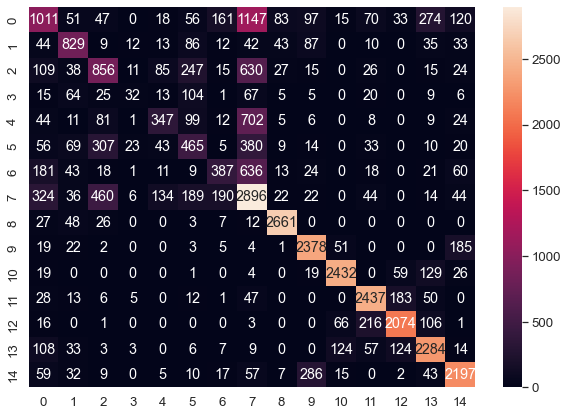

In [26]:
cm_noanom = metrics.confusion_matrix(labels_no_anomalies,y_noanom_pred)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
sn.heatmap(cm_noanom, annot=True, fmt='g')

### Downsampled
<p>Using the downsampled dataset of size 5490 to mitigate for class imbalance (sampled same number of records from each class), the model's accuracy decreased to 59%. This could be because since the records from various classes are so similar (as proven by analysis on the clustering), having a lot of data was a strength of the dataset that allowed the model to pick up on more minute differences between records of different classes the more it trained. Now that there are much fewer records from each classes, it is harder for the model to differentiate between classes as well as before and it is more likely to misclassify.</p>

In [21]:
scaler = StandardScaler()
mlp_down = MLPClassifier(random_state=1, early_stopping=True, max_iter=50)

mlp_param = {
    'mlp__hidden_layer_sizes': list(range(90, 110, 10)),
    'mlp__activation': ('logistic', 'tanh', 'relu'),
    'mlp__solver': ('sgd','adam'),
    'mlp__alpha': (0.0001, 0.05),
    'mlp__learning_rate': ('constant','adaptive') 
}

mlp_down_pipe = Pipeline([('scaler', scaler), ('mlp', mlp_down)])
mlp_down_grid = GridSearchCV(mlp_down_pipe, mlp_param, n_jobs=-1, cv=5)
y_down_pred = cross_val_predict(mlp_down_grid, samp_features, samp_genres, cv=5)

C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ashak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ashak\AppData\Lo

In [22]:
print('Results on the downsampled dataset:')
print(classification_report(samp_genres, y_down_pred))

Results on the downsampled dataset:
                 precision    recall  f1-score   support

      Dark Trap       0.46      0.31      0.37       366
            Emo       0.56      0.62      0.59       366
         Hiphop       0.46      0.42      0.44       366
            Pop       0.45      0.46      0.45       366
            Rap       0.40      0.43      0.41       366
            RnB       0.38      0.38      0.38       366
     Trap Metal       0.45      0.48      0.46       366
Underground Rap       0.28      0.29      0.28       366
            dnb       0.86      0.89      0.87       366
      hardstyle       0.69      0.67      0.68       366
      psytrance       0.83      0.86      0.84       366
      techhouse       0.77      0.77      0.77       366
         techno       0.74      0.80      0.77       366
         trance       0.68      0.70      0.69       366
           trap       0.73      0.68      0.71       366

       accuracy                           0.59    

<AxesSubplot:>

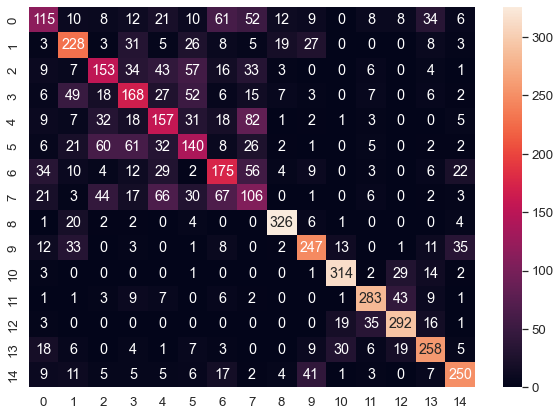

In [23]:
cm=metrics.confusion_matrix(samp_genres,y_down_pred)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
sn.heatmap(cm, annot=True, fmt='g')